# credit-card-approval-prediction 문제

- 제작자: 서동옥
- 도움을 주신분: 신동원

### 문제1: application_recode.csv와 credit_record.csv를 appli과 cred에 데이터프레임으로 할당하세요

In [3]:
# 1. 데이터 프레임 할당
import pandas as pd
appli = pd.read_csv('application_record.csv')
cred = pd.read_csv('credit_record.csv')

In [17]:
appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [18]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### 문제2: appli과 cred의 행과 열의 길이를 출력하세요

In [11]:
# 2. 행/열 길이 출력
appli.shape, cred.shape

((438557, 18), (1048575, 3))

### 문제3: appli의 결측치를 확인하고 있다면 해당 열(colume)을 삭제하세요

STATUS 변경:

0: 29

1: 59

2: 89

3: 119

4: 149

5: 200

c: 0

x: 0

In [14]:
# 3. 결측치 확인
appli.isna().sum()
# OCCUPATION_TYPE        134203

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [15]:
# 결측치 열(OCCUPATION_TYPE)삭제
appli.drop('OCCUPATION_TYPE', axis=1, inplace=True)
appli.shape

(438557, 17)

In [16]:
appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### 문제4: applie과 cred를 id를 기준으로 합쳐서 df라는 하나의 데이터 프레임으로 만드세요

In [4]:
# 4. applie과 cred를 id를 기준으로 병합
df = pd.merge(appli, cred, on='ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

### 문제5: NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE 열의 고유한 데이터의 수를 출력하세요.

In [31]:
# 5. 해당 열의 고유한 데이터 개수
et = appli['NAME_EDUCATION_TYPE'].nunique()
fs = appli['NAME_FAMILY_STATUS'].nunique()
ht = appli['NAME_HOUSING_TYPE'].nunique()
# len(df['NAME_HOUSING_TYPE'].unique())

print(f"NAME_EDUCATION_TYPE 열의 고유한 데이터 수: {et}")
print(f"NAME_FAMILY_STATUS 열의 고유한 데이터 수: {fs}")
print(f"NAME_HOUSING_TYPE 열의 고유한 데이터 수: {ht}")

NAME_EDUCATION_TYPE 열의 고유한 데이터 수: 5
NAME_FAMILY_STATUS 열의 고유한 데이터 수: 5
NAME_HOUSING_TYPE 열의 고유한 데이터 수: 6


### 문제6:ID가 중복 데이터의 수를 확인하고 전체 데이터셋의 상위 10개와 하위 10개를 각각 출력하세요

In [36]:
# 6. ID의 중복 데이터 수
df['ID'].duplicated().sum()

741258

In [38]:
# 전체 데이터셋의 상위 10개
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-9,C


In [39]:
# 전체 데이터셋의 하위 10개
df.tail(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777705,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-4,0
777706,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-5,0
777707,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-6,0
777708,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-7,0
777709,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-8,0
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0
777714,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-13,0


### 문제7: 컬럼을 다음과 같이 수정하세요

    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'

In [6]:
# 7. 칼럼 수정, 딕셔너리 형태로 생성
col_dict = {
'CODE_GENDER': 'gender',
'FLAG_OWN_CAR': 'own_car',
'FLAG_OWN_REALTY': 'own_property',
'CNT_CHILDREN': 'children',
'AMT_INCOME_TOTAL': 'income',
'NAME_INCOME_TYPE': 'income_type',
'NAME_EDUCATION_TYPE': 'education',
'NAME_FAMILY_STATUS': 'family_status',
'NAME_HOUSING_TYPE': 'housing_type',
'FLAG_MOBIL': 'mobile',
'FLAG_WORK_PHONE': 'work_phone',
'FLAG_PHONE': 'phone',
'FLAG_EMAIL': 'email',
'CNT_FAM_MEMBERS': 'family_members',
'MONTHS_BALANCE': 'months_balance',
'STATUS' : 'status',
'DAYS_BIRTH' : 'age_in_days',
'DAYS_EMPLOYED' : 'employment_in_days'}

In [53]:
df2 = pd.merge(appli, cred, on='ID')

new_columns = [col_dict[col] if col in col_dict else col for col in df2.columns]

for col in df2.columns: # df2의 모든 칼럼에 대해
  if col in col_dict:   # 딕셔너리에 해당 칼럼이 있으면
    col_dict[col]       # 딕셔너리의 키에 해당하는 값으로 변경
  else:
    col                 # 그외에는 그대로 둔다

df2.columns = new_columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  777715 non-null  int64  
 1   gender              777715 non-null  object 
 2   own_car             777715 non-null  object 
 3   own_property        777715 non-null  object 
 4   children            777715 non-null  int64  
 5   income              777715 non-null  float64
 6   income_type         777715 non-null  object 
 7   education           777715 non-null  object 
 8   family_status       777715 non-null  object 
 9   housing_type        777715 non-null  object 
 10  age_in_days         777715 non-null  int64  
 11  employment_in_days  777715 non-null  int64  
 12  mobile              777715 non-null  int64  
 13  work_phone          777715 non-null  int64  
 14  phone               777715 non-null  int64  
 15  email               777715 non-nul

In [7]:
# 이 방법이 훨씬 쉽다.
df.rename(columns=col_dict, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  777715 non-null  int64  
 1   gender              777715 non-null  object 
 2   own_car             777715 non-null  object 
 3   own_property        777715 non-null  object 
 4   children            777715 non-null  int64  
 5   income              777715 non-null  float64
 6   income_type         777715 non-null  object 
 7   education           777715 non-null  object 
 8   family_status       777715 non-null  object 
 9   housing_type        777715 non-null  object 
 10  age_in_days         777715 non-null  int64  
 11  employment_in_days  777715 non-null  int64  
 12  mobile              777715 non-null  int64  
 13  work_phone          777715 non-null  int64  
 14  phone               777715 non-null  int64  
 15  email               777715 non-nul

### 문제8: 컬럼 gender가 F인 경우 female, M인 경우 male으로 수정하세요

In [13]:
# 8. gender 컬럼의 이름을 묶어서 변경
df['gender'] = df['gender'].replace({'F':'female', 'M':'male'})
df['gender']

0         male
1         male
2         male
3         male
4         male
          ... 
777710    male
777711    male
777712    male
777713    male
777714    male
Name: gender, Length: 777715, dtype: object

### 문제9: gender가 male일때 own_car가 Y인 경우의 합을 출력하세요

In [18]:
# 9. gender = male인 데이터 프레임 저장
# 새 데이터프레임에서 own_car가 Y인 경우의 개수 출력
df3 = df[(df['gender'] == 'male')]
df3['own_car'].value_counts()['Y']

167228

### 문제10:housing_type의 별로 income을 산포도로 나타내고 100000, 300000에 기준선을 만드세요.![10번.png](attachment:2e4ff0ba-a724-4949-bc3d-37649ae0f9b9.png)

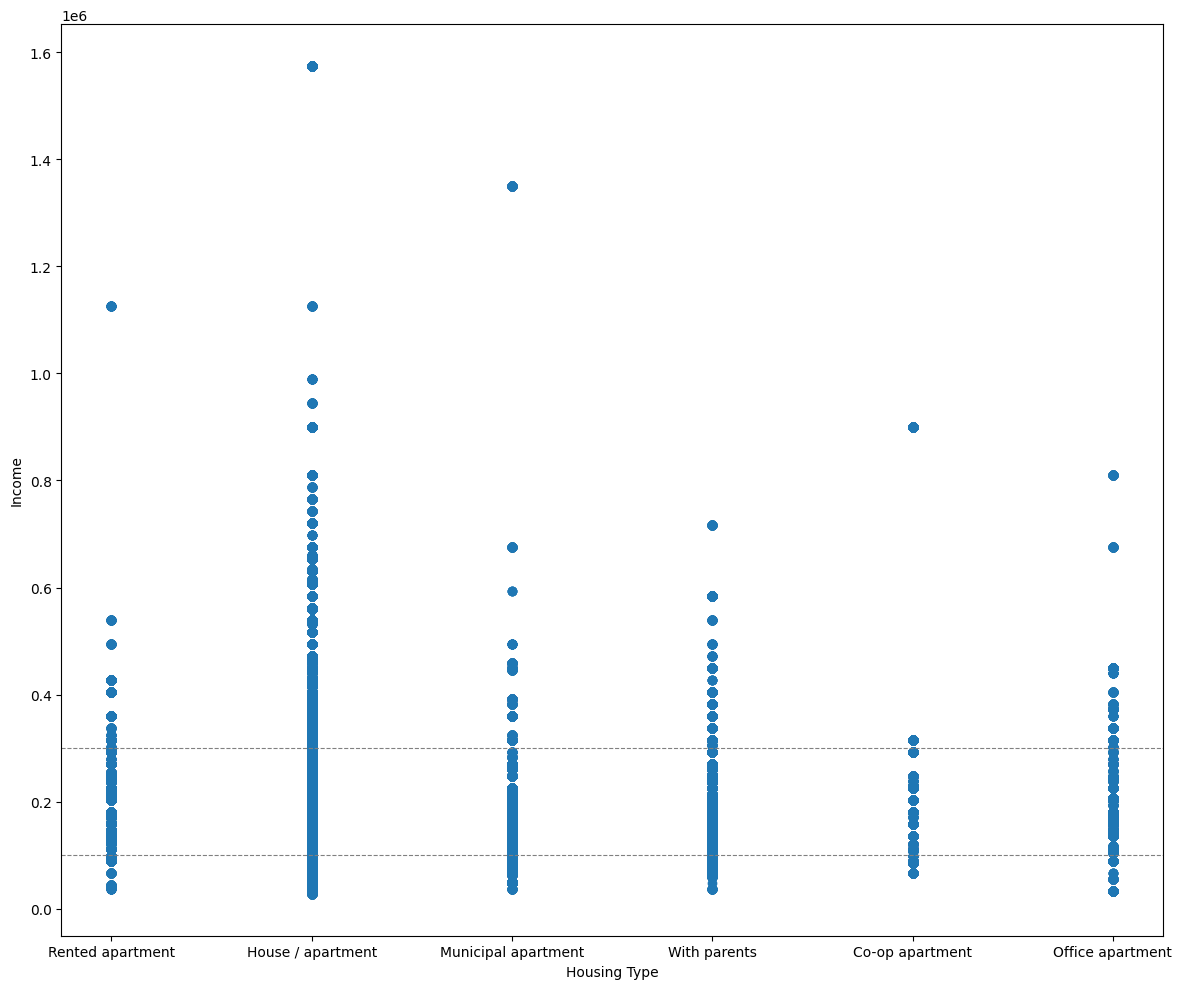

In [34]:
### 문제10:housing_type의 별로 income을 산포도로 나타내고 100000, 300000에 기준선을 만드세요.
from matplotlib import pyplot as plt
# 산포도 : scatter
plt.figure(figsize=(12, 10))
plt.scatter(df['housing_type'], df['income'])
plt.ylabel('Income')
plt.xlabel('Housing Type')
# plt.xticks(fontsize=10)
plt.axhline(100000, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(300000, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [38]:
# tip
# help(), dir() 함수
# dir() : 함수는 객체가 가지고 있는 속성과 메서드를 리스트 형태로 반환한다.
# help() : help함수는 파이썬에서 객체의 도움말 정보를 제공하는 데 사용된다.

# 사용법 예시
# 내가 pandas의 어떤 기능을 사용하고싶은데, 이름이 잘 생각안날때?
import pandas as pd

print(dir(pd))
# 아래와 같이 반환됨
# ['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame',
# 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype',
# 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype',
# 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period',
# 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta',
# 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__',
# '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__',
# '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_is_numpy_dev', '_libs', '_testing',
#  '_typing', '_version', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'concat', 'core', 'crosstab',
#  'cut', 'date_range', 'describe_option', 'errors', 'eval', 'factorize', 'from_dummies', 'get_dummies', 'get_option',
# 'infer_freq', 'interval_range', 'io', 'isna', 'isnull', 'json_normalize', 'lreshape', 'melt', 'merge', 'merge_asof',
#  'merge_ordered', 'notna', 'notnull', 'offsets', 'option_context', 'options', 'pandas', 'period_range', 'pivot',
# 'pivot_table', 'plotting', 'qcut', 'read_clipboard', 'read_csv', 'read_excel', 'read_feather', 'read_fwf', 'read_gbq',
#  'read_hdf', 'read_html', 'read_json', 'read_orc', 'read_parquet', 'read_pickle', 'read_sas', 'read_spss', 'read_sql',
#  'read_sql_query', 'read_sql_table', 'read_stata', 'read_table', 'read_xml', 'reset_option', 'set_eng_float_format',
# 'set_option', 'show_versions', 'test', 'testing', 'timedelta_range', 'to_datetime', 'to_numeric', 'to_pickle',
#  'to_timedelta', 'tseries', 'unique', 'util', 'value_counts', 'wide_to_long']

# unique가 궁금하다면?
print(help(pd.unique))
# 아래처럼 어떻게 사용할지 예제를 보여준다.

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_is_numpy_dev', '_libs', '_testing', '_typing', '_version', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'concat', 'core', 'crosstab', 'cut', 'date_range', 'describe_option', 'errors', '

In [40]:
# from sklearn.. 아 내가 랜덤포레스트를 사용하고싶은데 어떻게 해야하지?

# sklearn을 import 후 help로 도움
import sklearn

print(help(sklearn))

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime